In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [30]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'TSLA', 'JPM', 'V', 'UNH']


In [31]:
stock_dataframes = {}

In [32]:

for symbol in stocks:
    stock = yf.download(symbol, start='2010-01-01', end='2023-05-01', progress=False)
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock

stock_dataframes['AAPL'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


# DESCENDING TRIANGLE:

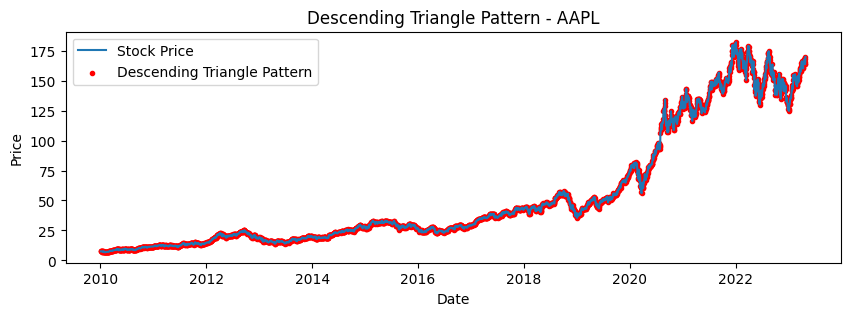

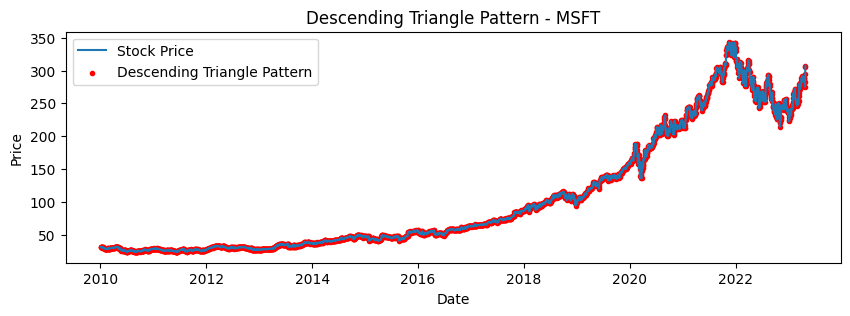

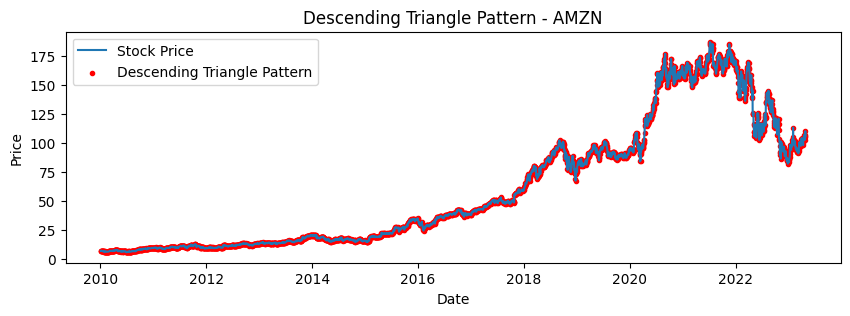

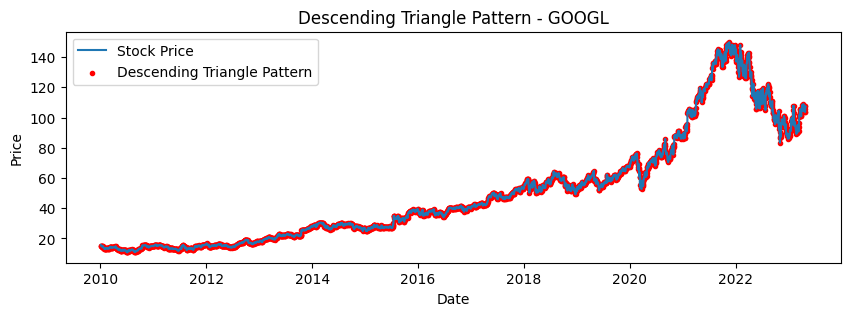

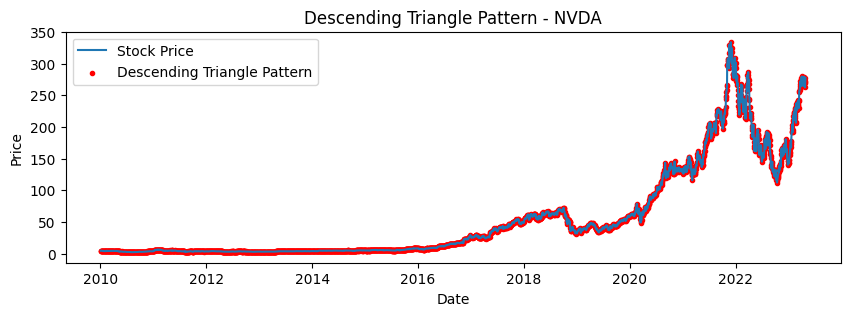

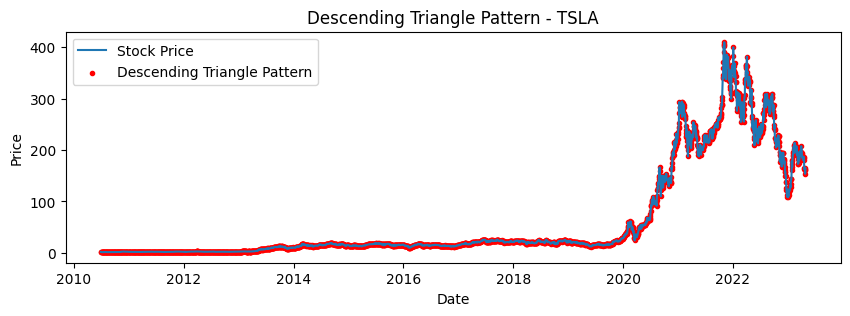

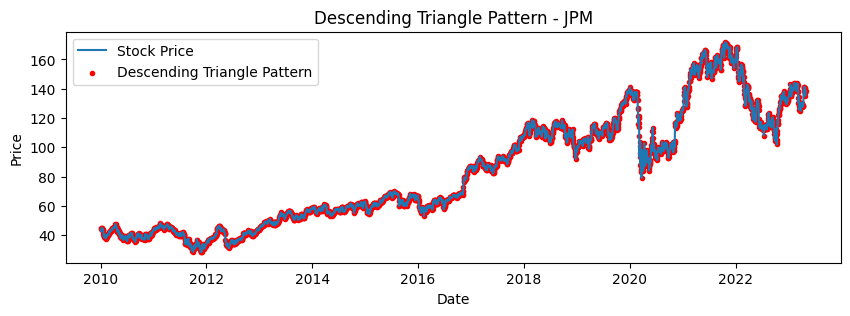

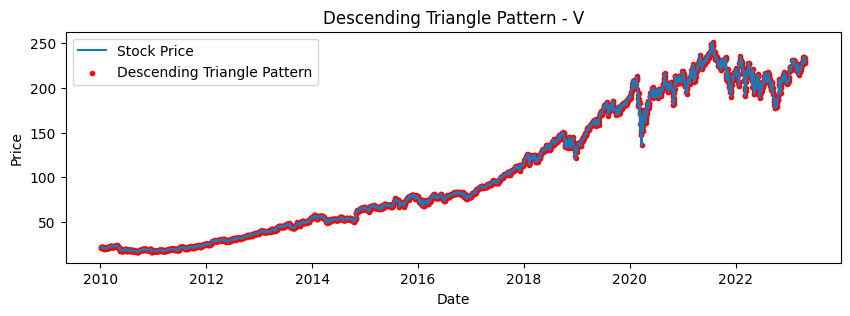

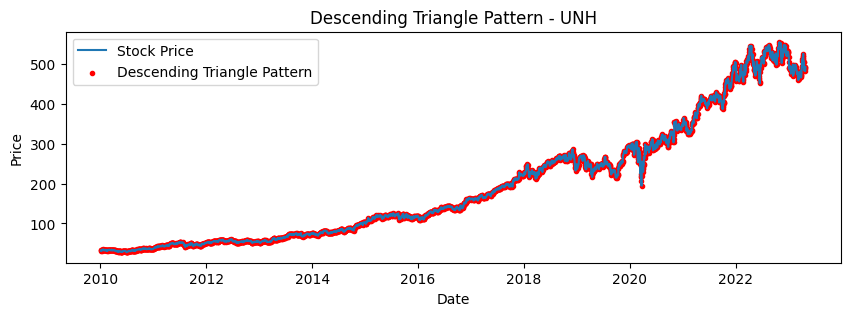

In [33]:
# Descending Triangle Pattern

for symbol, df in stock_dataframes.items():
    df.set_index('Date', inplace=True)

    df['Resistance'] = df['High'].rolling(window=3).max()
    df['Support'] = df['Low'].rolling(window=3).min()

    descending_triangle_days = df[(df['High'] <= df['Resistance']) & (df['Low'] >= df['Support'])]

    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df['Close'], label='Stock Price')
    plt.scatter(descending_triangle_days.index, descending_triangle_days['Close'], marker='.', color='red', label='Descending Triangle Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Descending Triangle Pattern - {symbol}')
    plt.legend()
    plt.show()


# Bull Flag

[*********************100%***********************]  1 of 1 completed


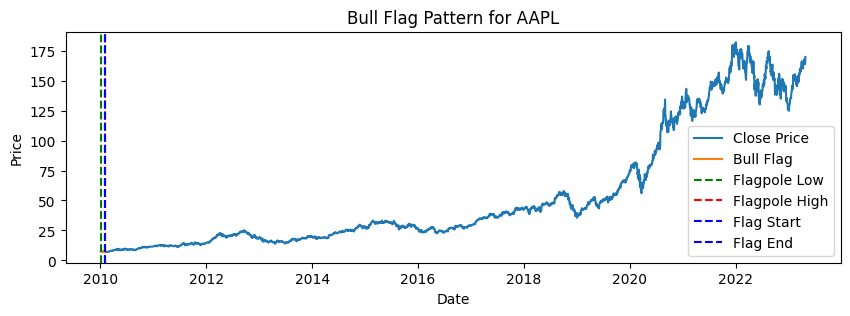

[*********************100%***********************]  1 of 1 completed


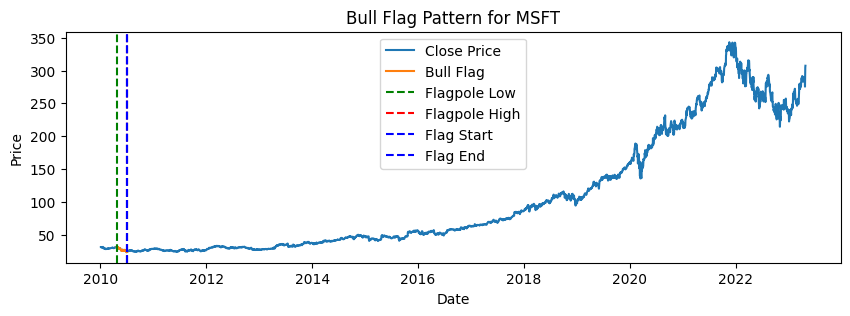

[*********************100%***********************]  1 of 1 completed


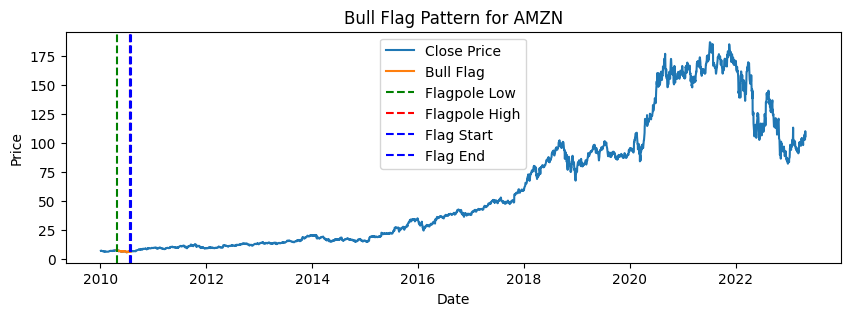

[*********************100%***********************]  1 of 1 completed


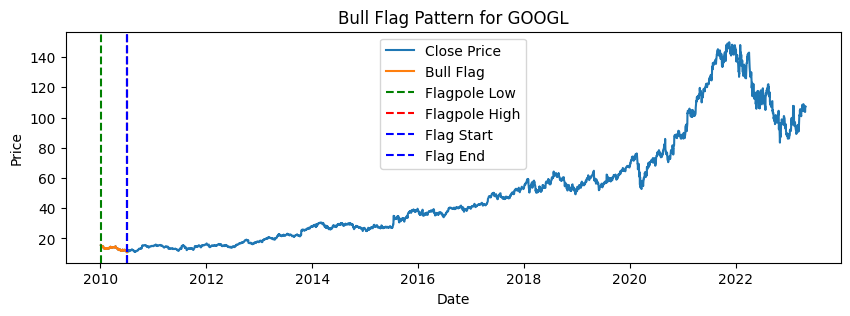

[*********************100%***********************]  1 of 1 completed


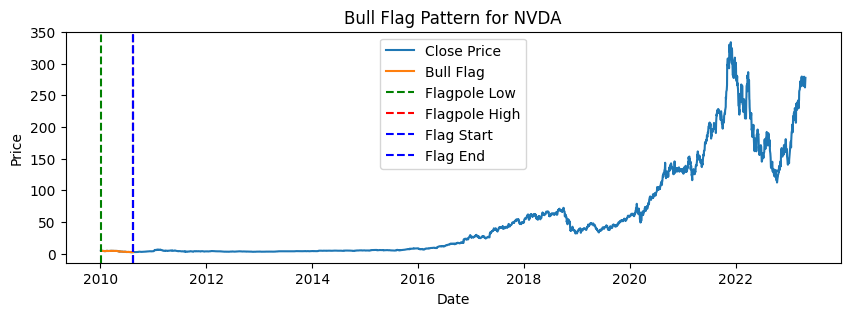

[*********************100%***********************]  1 of 1 completed


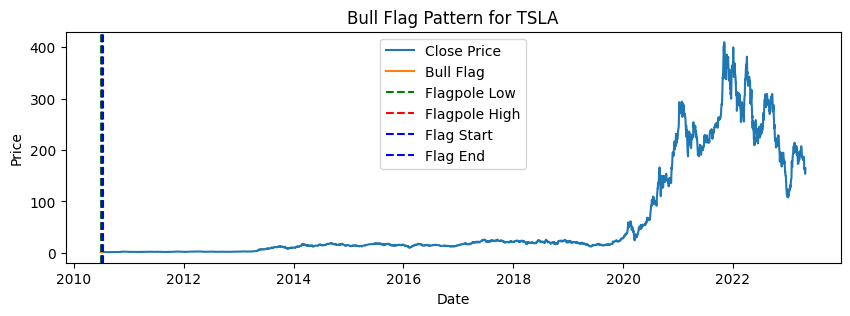

[*********************100%***********************]  1 of 1 completed


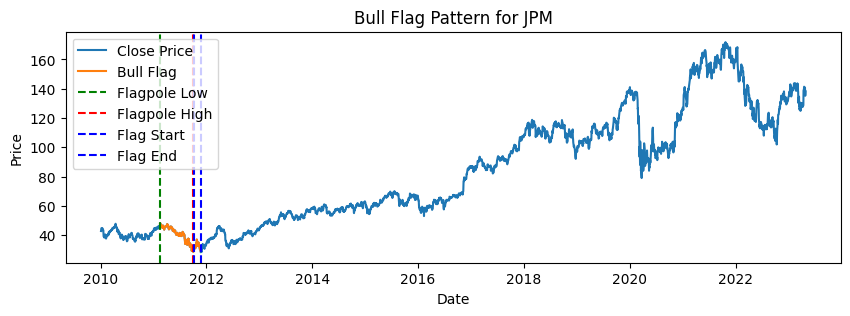

[*********************100%***********************]  1 of 1 completed


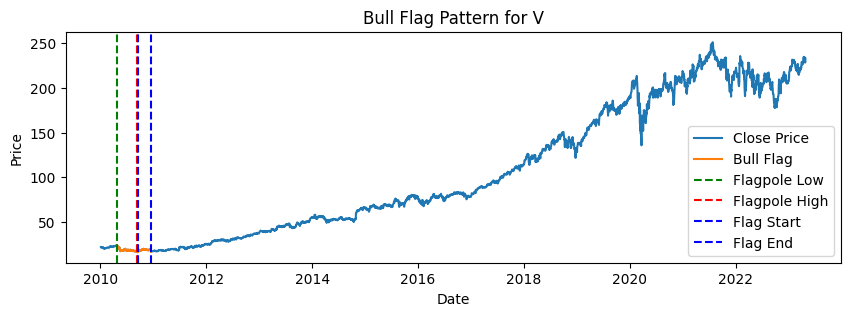

[*********************100%***********************]  1 of 1 completed


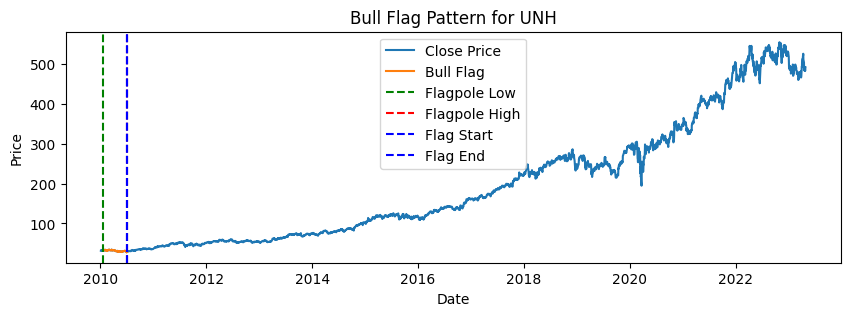

In [41]:
def plot_bull_flag(symbol, stock_dataframe):
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    flagpole_low = low_prices.idxmin()
    flagpole_high = high_prices[:flagpole_low].idxmax()
    flag_start = flagpole_low + 1
    flag_end = close_prices[flag_start:].idxmin()

    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[flagpole_high:flag_end], close_prices[flagpole_high:flag_end], label='Bull Flag')
    plt.axvline(x=dates[flagpole_high], color='g', linestyle='--', linewidth=1.5, label='Flagpole Low')
    plt.axvline(x=dates[flagpole_low], color='r', linestyle='--', linewidth=1.5, label='Flagpole High')
    plt.axvline(x=dates[flag_start], color='b', linestyle='--', linewidth=1.5, label='Flag Start')
    plt.axvline(x=dates[flag_end], color='b', linestyle='--', linewidth=1.5, label='Flag End')
    plt.title(f'Bull Flag Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

stock_dataframes = {}

for symbol in stocks:
    stock = yf.download(symbol, start='2010-01-01', end='2023-05-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_bull_flag(symbol, stock_dataframes[symbol])

# Inverted Cup and Handle

[*********************100%***********************]  1 of 1 completed


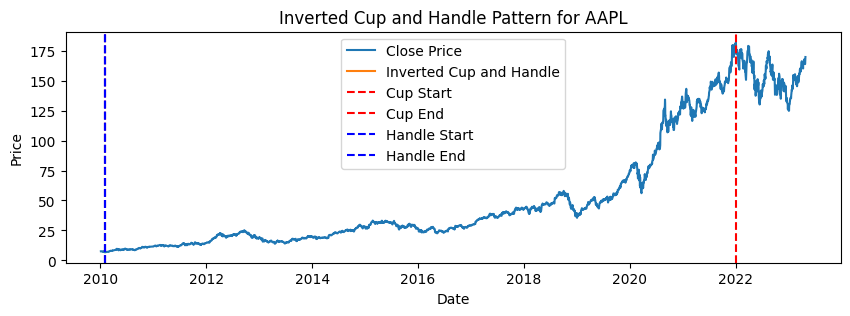

[*********************100%***********************]  1 of 1 completed


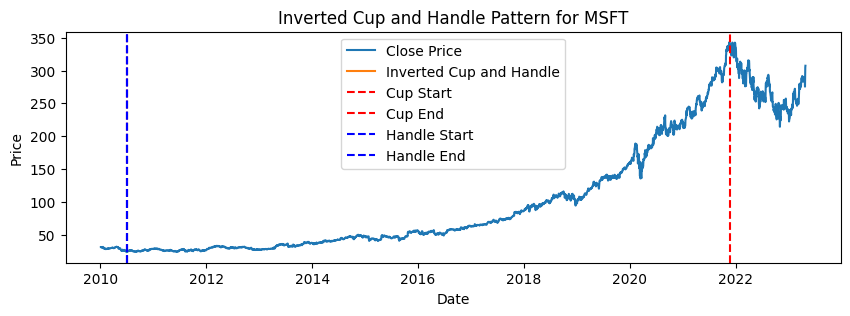

[*********************100%***********************]  1 of 1 completed


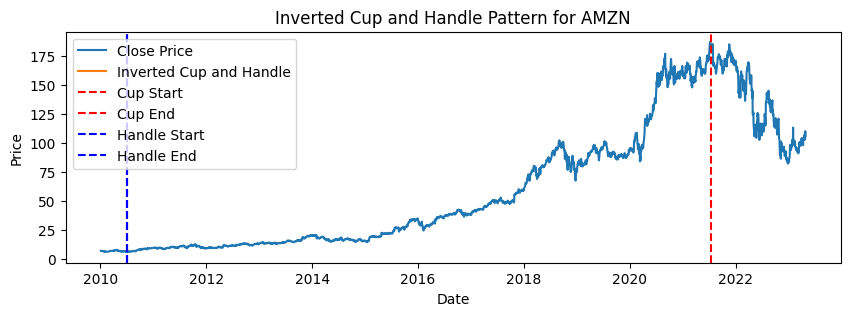

[*********************100%***********************]  1 of 1 completed


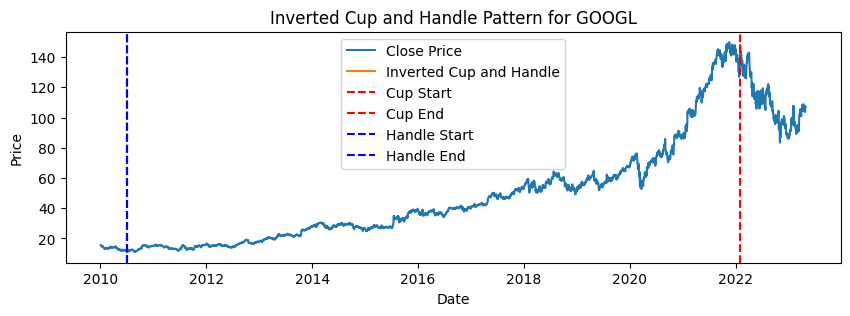

[*********************100%***********************]  1 of 1 completed


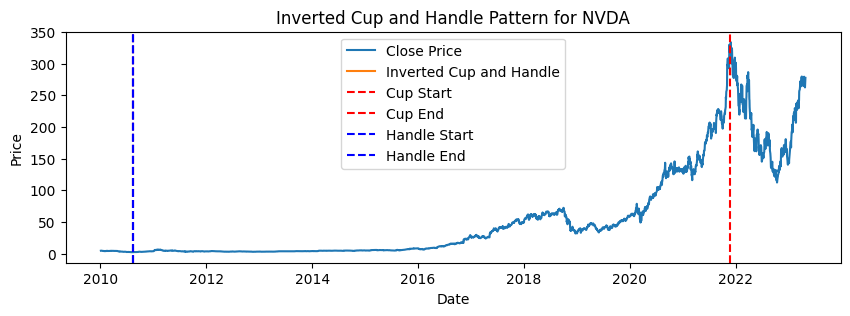

[*********************100%***********************]  1 of 1 completed


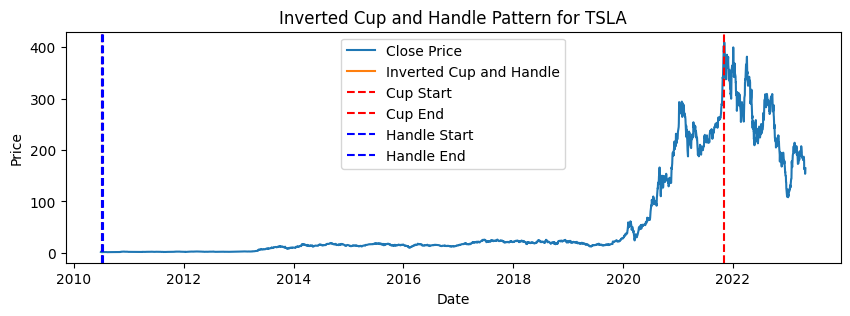

[*********************100%***********************]  1 of 1 completed


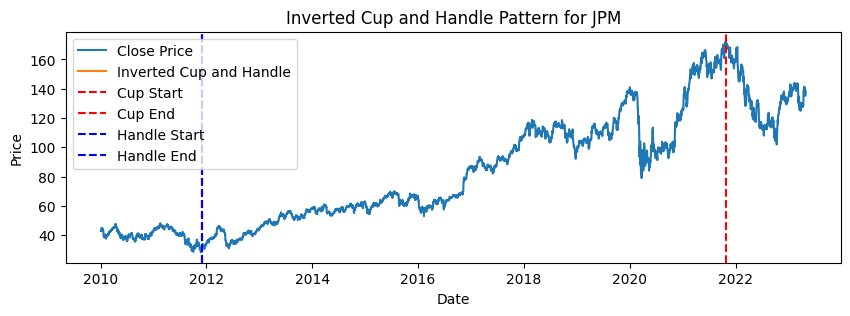

[*********************100%***********************]  1 of 1 completed


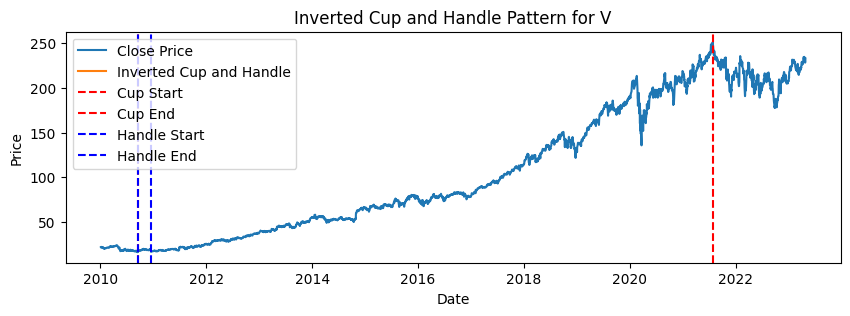

[*********************100%***********************]  1 of 1 completed


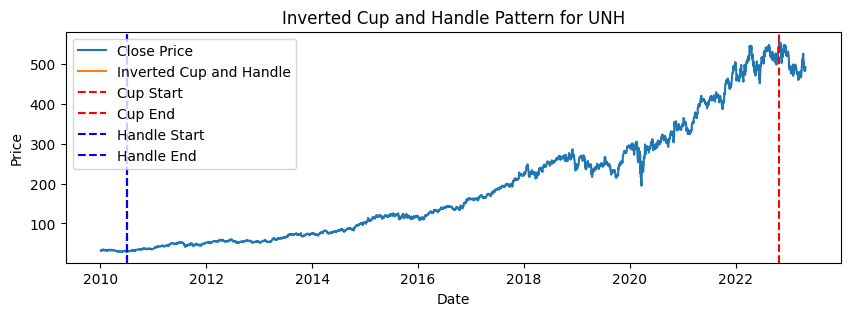

In [42]:
# Inverted Cup and Handle Pattern

def plot_inverted_cup_and_handle(symbol, stock_dataframe):
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the inverted cup and handle boundaries
    cup_start = high_prices.idxmax()
    cup_end = high_prices.idxmin()
    handle_start = cup_end + 1
    handle_end = close_prices[handle_start:].idxmin()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[cup_start:handle_end], close_prices[cup_start:handle_end], label='Inverted Cup and Handle')

    # Plot inverted cup and handle boundaries
    plt.axvline(x=dates[cup_start], color='r', linestyle='--', linewidth=1.5, label='Cup Start')
    plt.axvline(x=dates[cup_end], color='r', linestyle='--', linewidth=1.5, label='Cup End')
    plt.axvline(x=dates[handle_start], color='b', linestyle='--', linewidth=1.5, label='Handle Start')
    plt.axvline(x=dates[handle_end], color='b', linestyle='--', linewidth=1.5, label='Handle End')

    plt.title(f'Inverted Cup and Handle Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

for symbol in stocks:
    stock = yf.download(symbol, start='2010-01-01', end='2023-05-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_inverted_cup_and_handle(symbol, stock_dataframes[symbol])


# Rounding Bottom:

[*********************100%***********************]  1 of 1 completed


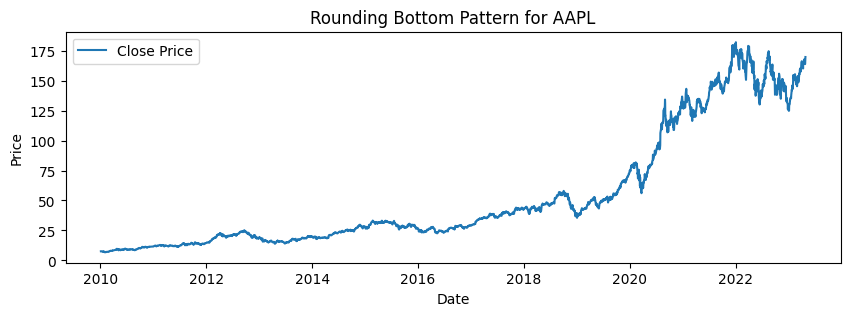

[*********************100%***********************]  1 of 1 completed


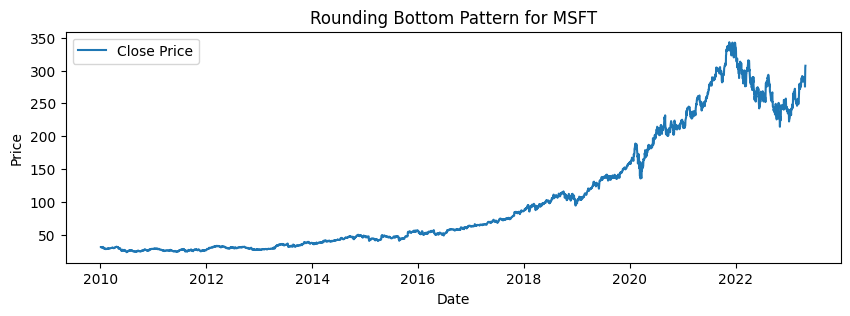

[*********************100%***********************]  1 of 1 completed


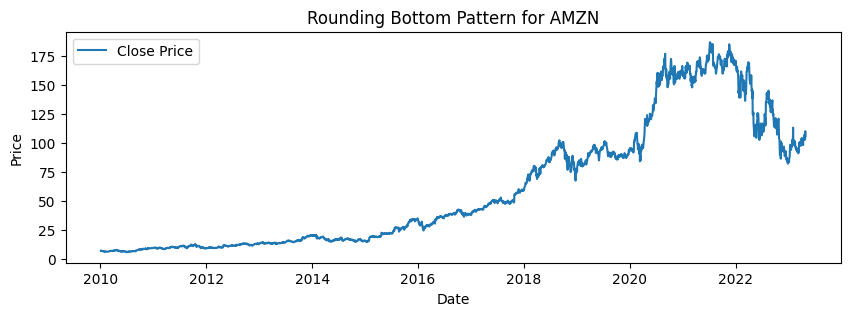

[*********************100%***********************]  1 of 1 completed


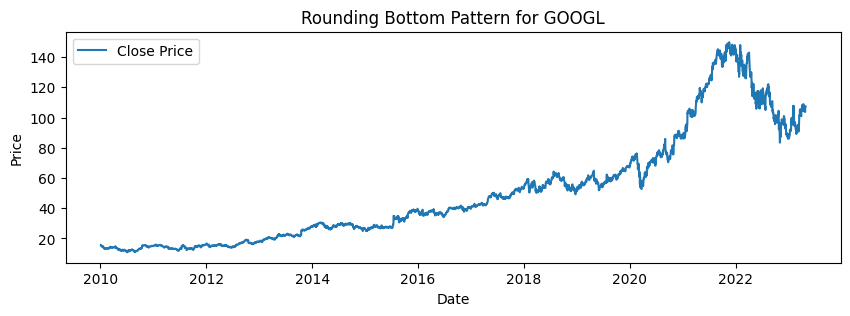

[*********************100%***********************]  1 of 1 completed


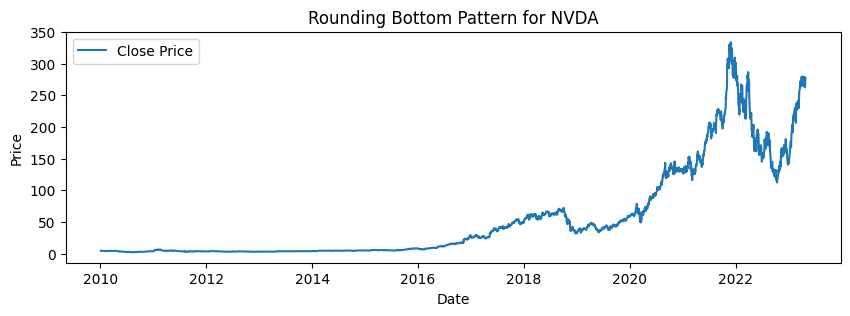

[*********************100%***********************]  1 of 1 completed


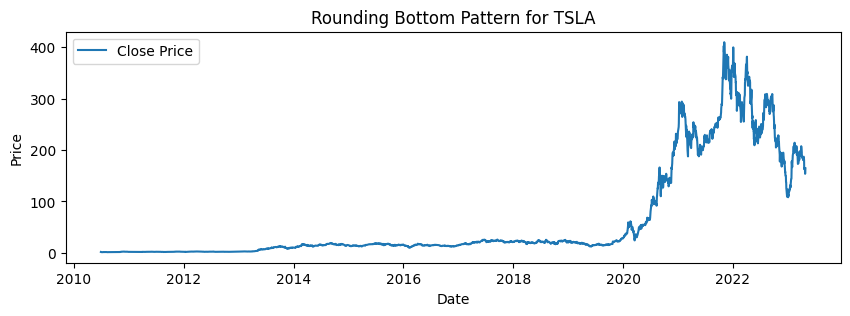

[*********************100%***********************]  1 of 1 completed


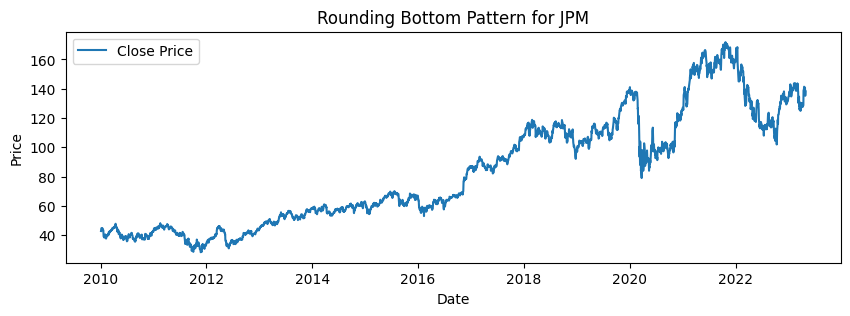

[*********************100%***********************]  1 of 1 completed


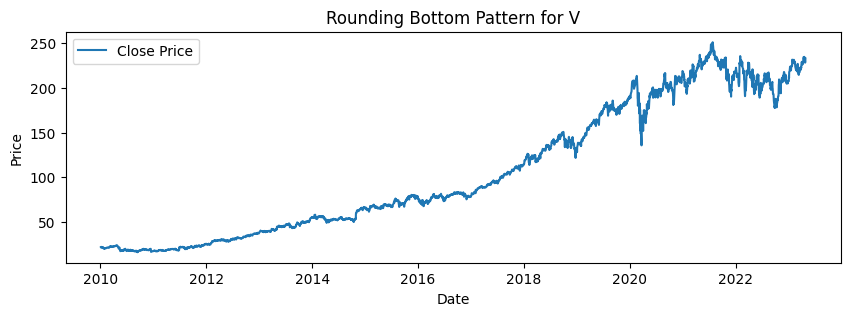

[*********************100%***********************]  1 of 1 completed


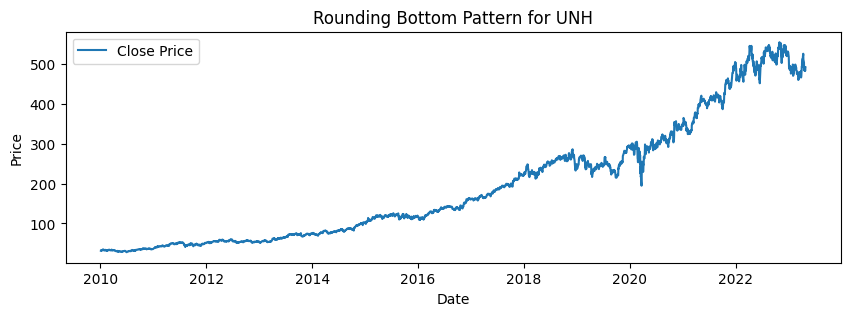

In [43]:
# Rounding Bottom Pattern

def plot_rounding_bottom(symbol, stock_dataframe):
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Add your code to detect and plot the rounding bottom pattern

    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')

    plt.title(f'Rounding Bottom Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

for symbol in stocks:
    stock = yf.download(symbol, start='2010-01-01', end='2023-05-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_rounding_bottom(symbol, stock_dataframes[symbol])